In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


### Loading dataset

In [42]:
df=pd.read_csv("C:\\Users\\nikhi\\OneDrive\\Desktop\\assignments\ML\\Comprehensive Assessment  Machine Learning\\CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### <font color="#4863A0">Initial informations about the dataset

In [43]:
#Displaying the first 5 rows
print('The first seven rows of the dataset are:\n')
df_rows=df.head()
for index,row in df_rows.iterrows():
    print(f'Row{index+1}:') #The index label of current row
    #Printing the content of current row
    print(row)

The first seven rows of the dataset are:

Row1:
car_ID                               1
symboling                            3
CarName             alfa-romero giulia
fueltype                           gas
aspiration                         std
doornumber                         two
carbody                    convertible
drivewheel                         rwd
enginelocation                   front
wheelbase                         88.6
carlength                        168.8
carwidth                          64.1
carheight                         48.8
curbweight                        2548
enginetype                        dohc
cylindernumber                    four
enginesize                         130
fuelsystem                        mpfi
boreratio                         3.47
stroke                            2.68
compressionratio                   9.0
horsepower                         111
peakrpm                           5000
citympg                             21
highwaympg      

In [44]:
#The shape of the dataset
print('The shape of dataset:',df.shape)
num_rows,num_cols=df.shape
print(f'Number of rows:{num_rows}')
print(f'Number of columns:{num_cols}')

The shape of dataset: (205, 26)
Number of rows:205
Number of columns:26


In [45]:
#  Basic information from dataset like "Column names", "Data types" and "Non-null values counts"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [46]:
#Descriptive statistics of numerical Variables only
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.00,59.32,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.83,1.25,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.76,6.02,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.05,12.34,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.91,2.15,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.72,2.44,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.57,520.68,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.91,41.64,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.33,0.27,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.26,0.31,2.07,3.11,3.29,3.41,4.17


- **count =** The number of non-null values.
- **mean =** Avarage.
- **Standard Deviation (std)=** A measure of the spread of the variable's values around the mean. A higher standard deviation indicates greater variability in the data.
- **min =** The smallest value. 
- **25% =** It represents the value below which 25% of the data fall
- **50% =** It represents the value below which 50% of the data fall
- **75% =** It represents the value below which 75% of the data fall
- **max =** The largest value.

In [47]:
#Descriptive analysis of categorical variable
df.describe(include=object)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [48]:
df.duplicated().sum()

0

In [49]:
#Changing Carname to only brand name 
df['CarName']=df['CarName'].str.split().str[0]
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# <font color="#686868" size="8"> Data Exploration(EDA) 🔍</font>

Exploratory Data Analysis (EDA), is an essential step in the machine learning pipeline. It involves **examining** and **visualizing the characteristics of a dataset to gain insights**, **understand patterns**, **detect anomalies**, and **prepare the data for further analysis** and **modeling**. some common techniques used in data exploration:
- Data Visualization
- Data Cleaning
- Data Preprocessing

# <font color="#4863A0"> Data Visualization

Creating visual representations such as **histograms**,**scatter plots**, **box plots**, and **heatmaps** to explore the distribution, relationships, and trends within the dataset. Visualization aids in identifying **patterns**, **correlations**, and **potential insights** that may not be apparent from just looking at the raw data. there are some ways to discover it:
- Graphical Analysis
    - Bar Charts
    - Pie Charts 
    - Histograms
- Correlation Analysis
- Data Relationships Analysis

## <font size="4" face="WildWest">1. Graphical Analysis</font>

In [50]:
#Brand analysis
brand_analysis=df.CarName.value_counts(dropna=False)
print(brand_analysis)


CarName
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: count, dtype: int64


In [51]:
df['CarName']=df['CarName'].str.replace('porcshce','porsche')
df['CarName']=df['CarName'].str.replace('vokswagen','volkswagen')
df['CarName']=df['CarName'].str.replace('toyouta','toyota')
df['CarName']=df['CarName'].str.replace('Nissan','nissan')
df['CarName']=df['CarName'].str.replace('vw','volkswagen')
df['CarName']=df['CarName'].str.replace('maxda','mazda')

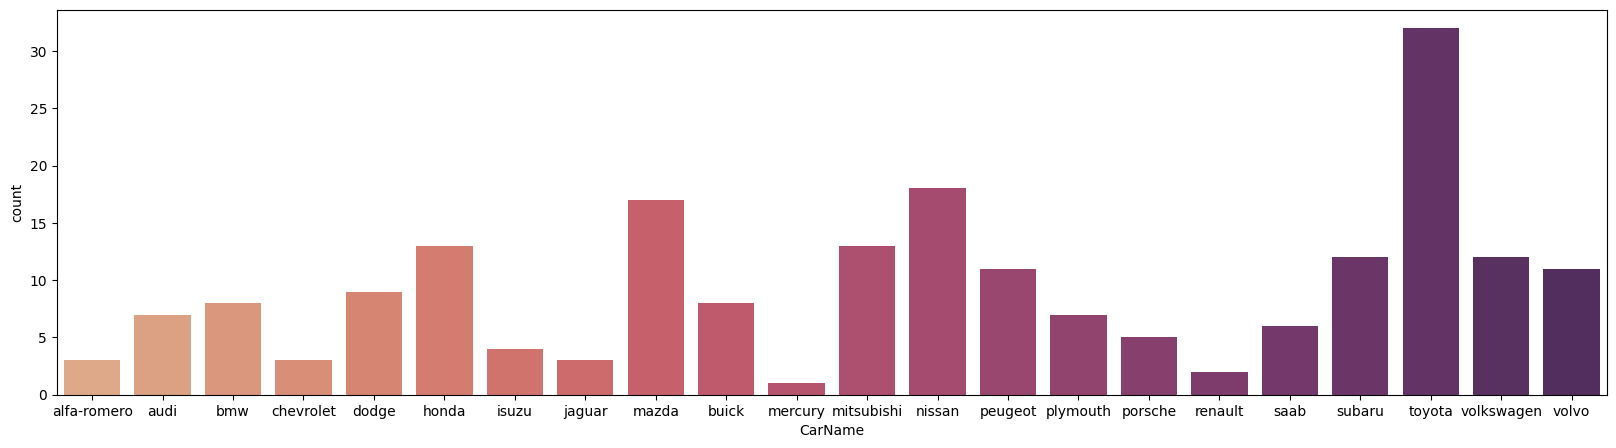

In [52]:
#Bar chart of car brands
plt.figure(figsize = (20,5))
sns.countplot(x='CarName',data=df,palette='flare')

plt.show()

### Toyota has most number of models in the market.
### Brand called Mercury leasts in the market

In [53]:
#changing the 'Door number' to integer from string
df_doorno=df['doornumber'].value_counts(dropna=False)
print(df_doorno)

doornumber
four    115
two      90
Name: count, dtype: int64


In [54]:
df['doornumber']=np.where(df['doornumber']=='four',4,2)
df['doornumber']

0      2
1      2
2      2
3      4
4      4
      ..
200    4
201    4
202    4
203    4
204    4
Name: doornumber, Length: 205, dtype: int32

In [55]:
#changing the 'Cylinder number' to integer from string
df['cylindernumber'].value_counts(dropna=False)

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

In [56]:
df['cylindernumber']=df['cylindernumber'].str.replace('four','4')
df['cylindernumber']=df['cylindernumber'].str.replace('six','6')
df['cylindernumber']=df['cylindernumber'].str.replace('five','5')
df['cylindernumber']=df['cylindernumber'].str.replace('eight','8')
df['cylindernumber']=df['cylindernumber'].str.replace('two','2')
df['cylindernumber']=df['cylindernumber'].str.replace('three','3')
df['cylindernumber']=df['cylindernumber'].str.replace('twelve','12')

In [57]:
df['cylindernumber']

0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: cylindernumber, Length: 205, dtype: object

In [58]:
df['cylindernumber']=(df['cylindernumber']).astype(int)

In [59]:
df['cylindernumber']

0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: cylindernumber, Length: 205, dtype: int32

In [60]:
#changing the string value of fueltype to int by gas =1,diesel=0
df['fueltype'].value_counts(dropna=False)

fueltype
gas       185
diesel     20
Name: count, dtype: int64

In [61]:
df['fueltype']=np.where(df['fueltype']=='gas',1,0)
df['fueltype']

0      1
1      1
2      1
3      1
4      1
      ..
200    1
201    1
202    1
203    0
204    1
Name: fueltype, Length: 205, dtype: int32

#### Encoding some categorical values 

In [62]:
df['enginetype'].value_counts(dropna=False)

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

In [63]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['enginetype']=label_encoder.fit_transform(df['enginetype'])
df['enginetype'].value_counts(dropna=False)


enginetype
3    148
4     15
5     13
0     12
2     12
6      4
1      1
Name: count, dtype: int64

In [64]:
df['fuelsystem'].value_counts(dropna=False)

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

In [65]:
df['fuelsystem']=label_encoder.fit_transform(df['fuelsystem'])
df['fuelsystem'].value_counts()

fuelsystem
5    94
1    66
3    20
0    11
6     9
2     3
4     1
7     1
Name: count, dtype: int64

In [66]:
df['carbody'].value_counts()

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

In [67]:
df['carbody']=label_encoder.fit_transform(df['carbody'])
df['carbody'].value_counts()

carbody
3    96
2    70
4    25
1     8
0     6
Name: count, dtype: int64

### checking the correlation between each columns in dataset

In [68]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,1,std,2,0,rwd,front,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,1,std,2,0,rwd,front,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,1,std,2,2,rwd,front,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,1,std,4,3,fwd,front,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,1,std,4,3,4wd,front,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,1,std,4,3,rwd,front,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo,1,turbo,4,3,rwd,front,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo,1,std,4,3,rwd,front,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo,0,turbo,4,3,rwd,front,109.1,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [69]:
df.describe(include=object)

,CarName,aspiration,drivewheel,enginelocation
count,205,205,205,205
unique,22,2,3,2
top,toyota,std,fwd,front
freq,32,168,120,202


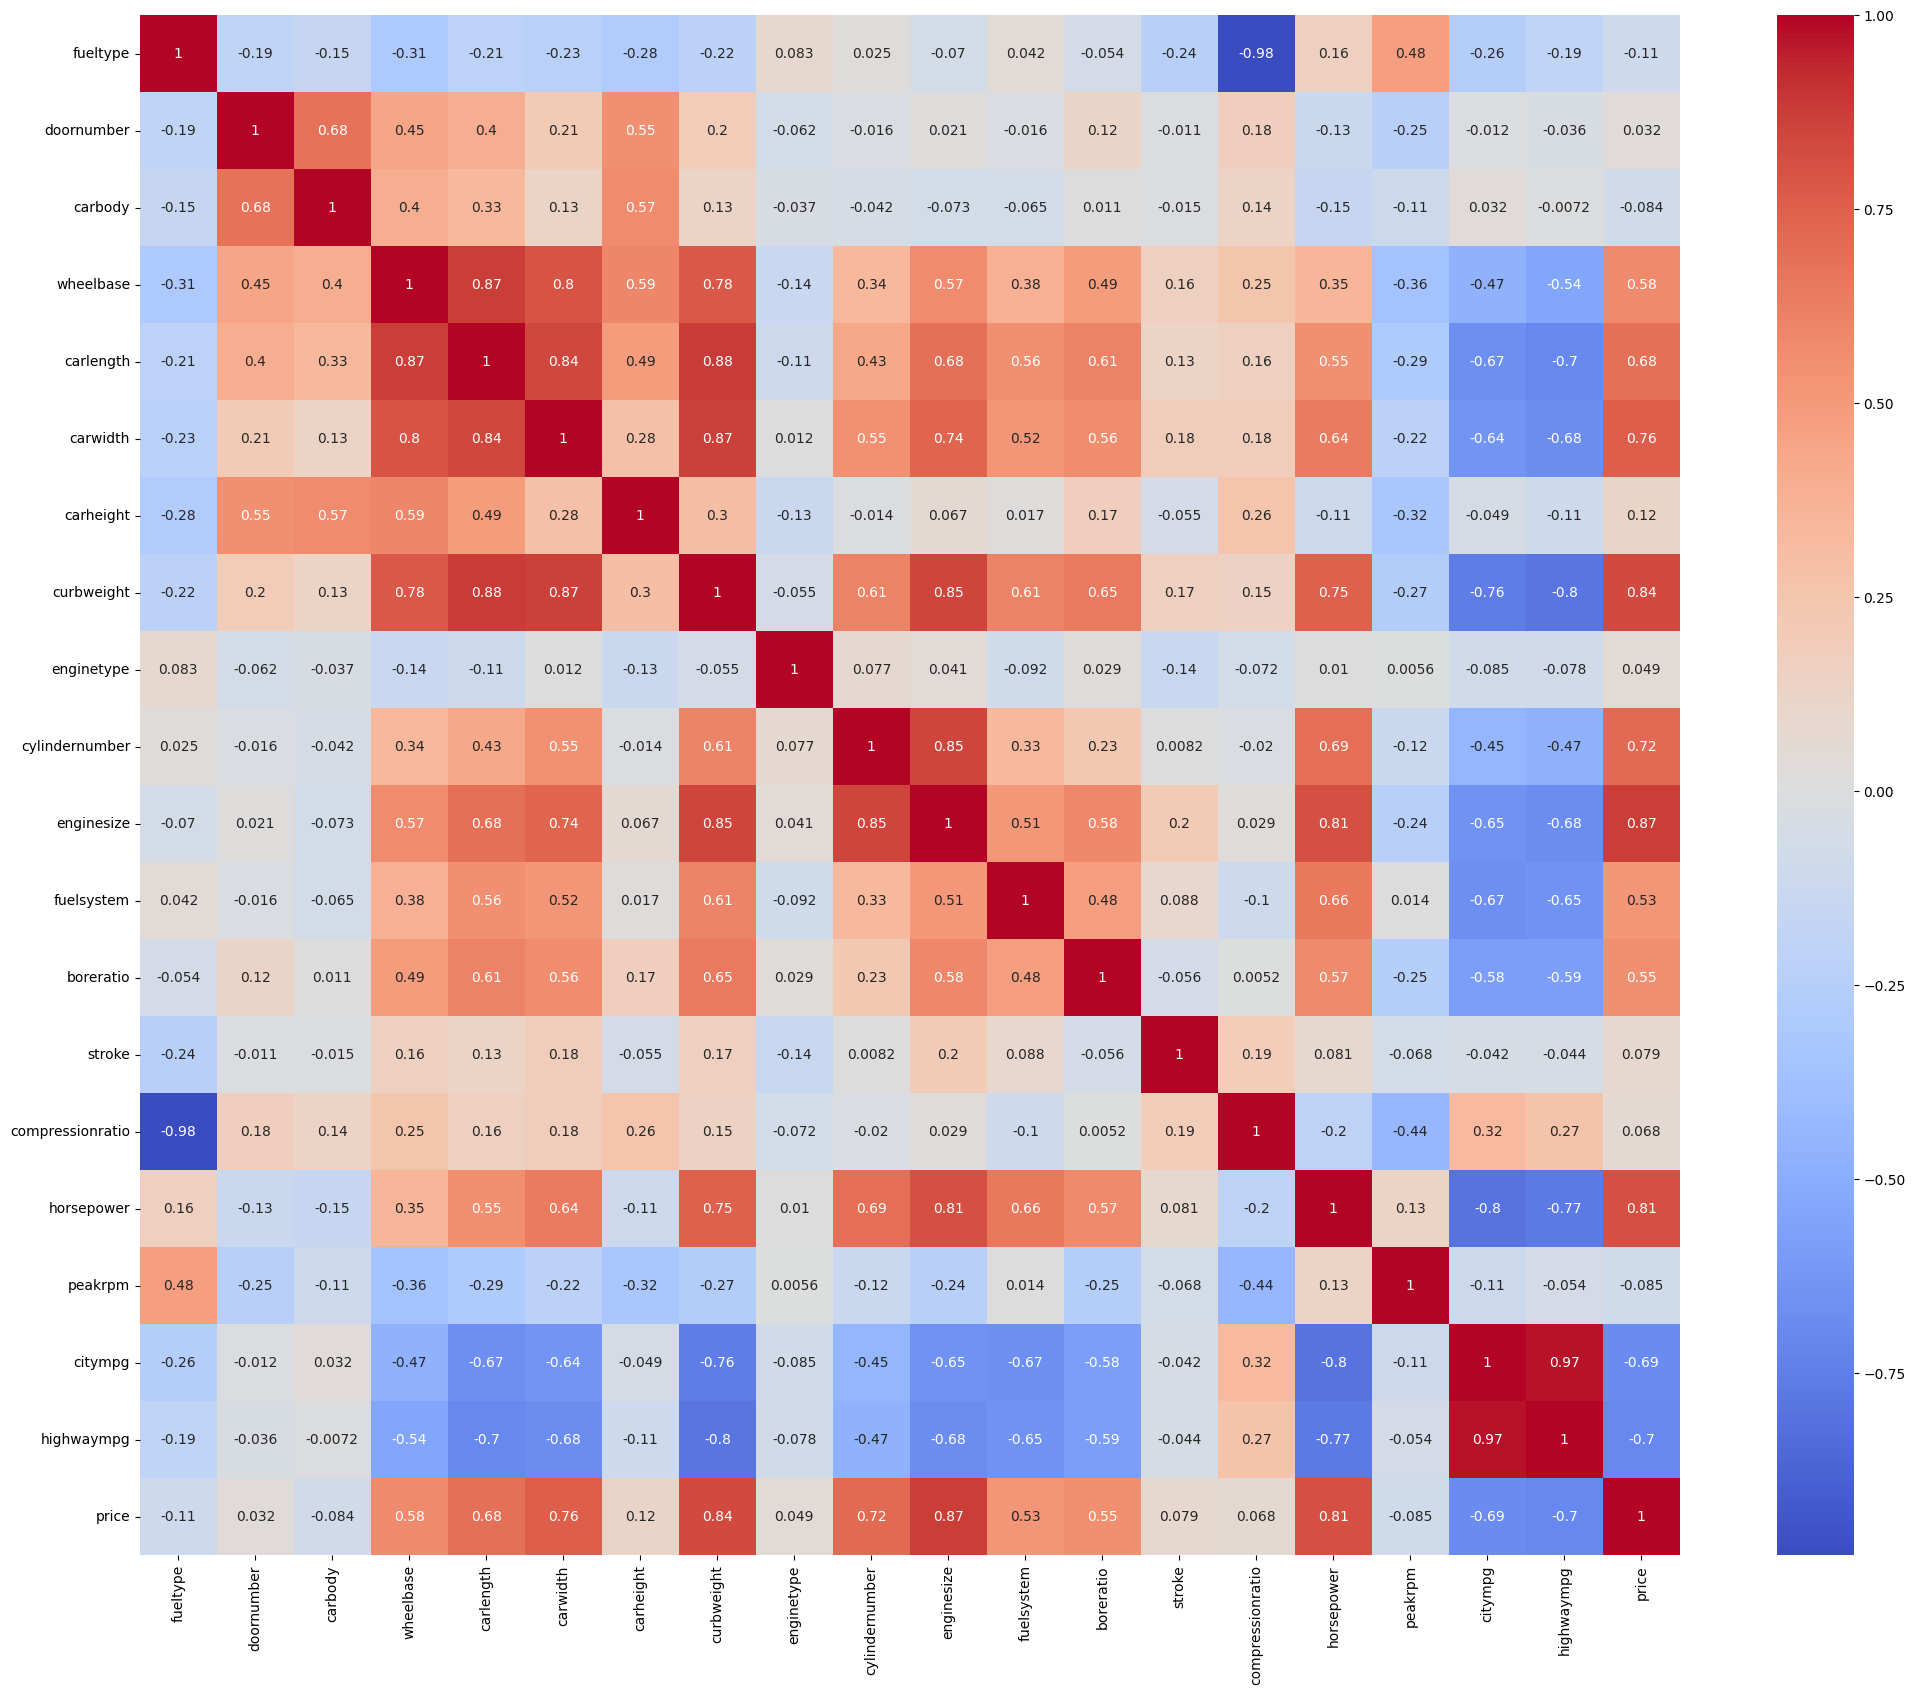

In [70]:
featurenames=df.drop(columns=['car_ID','symboling','CarName','aspiration','drivewheel','enginelocation'])
plt.figure(figsize=(25,20))
sns.heatmap(featurenames.corr(),annot=True,square=True,cmap='coolwarm')
plt.show()

#### *** From the above figure the most dependant features to price is:
##### 1.Horse power
##### 2.Engine size
##### 3.Curb weight
##### 4.Car width,length,wheel base
##### 5.Cylinder number
##### 6.Fuel system
##### 7.Bore ratio


### Checking outliers

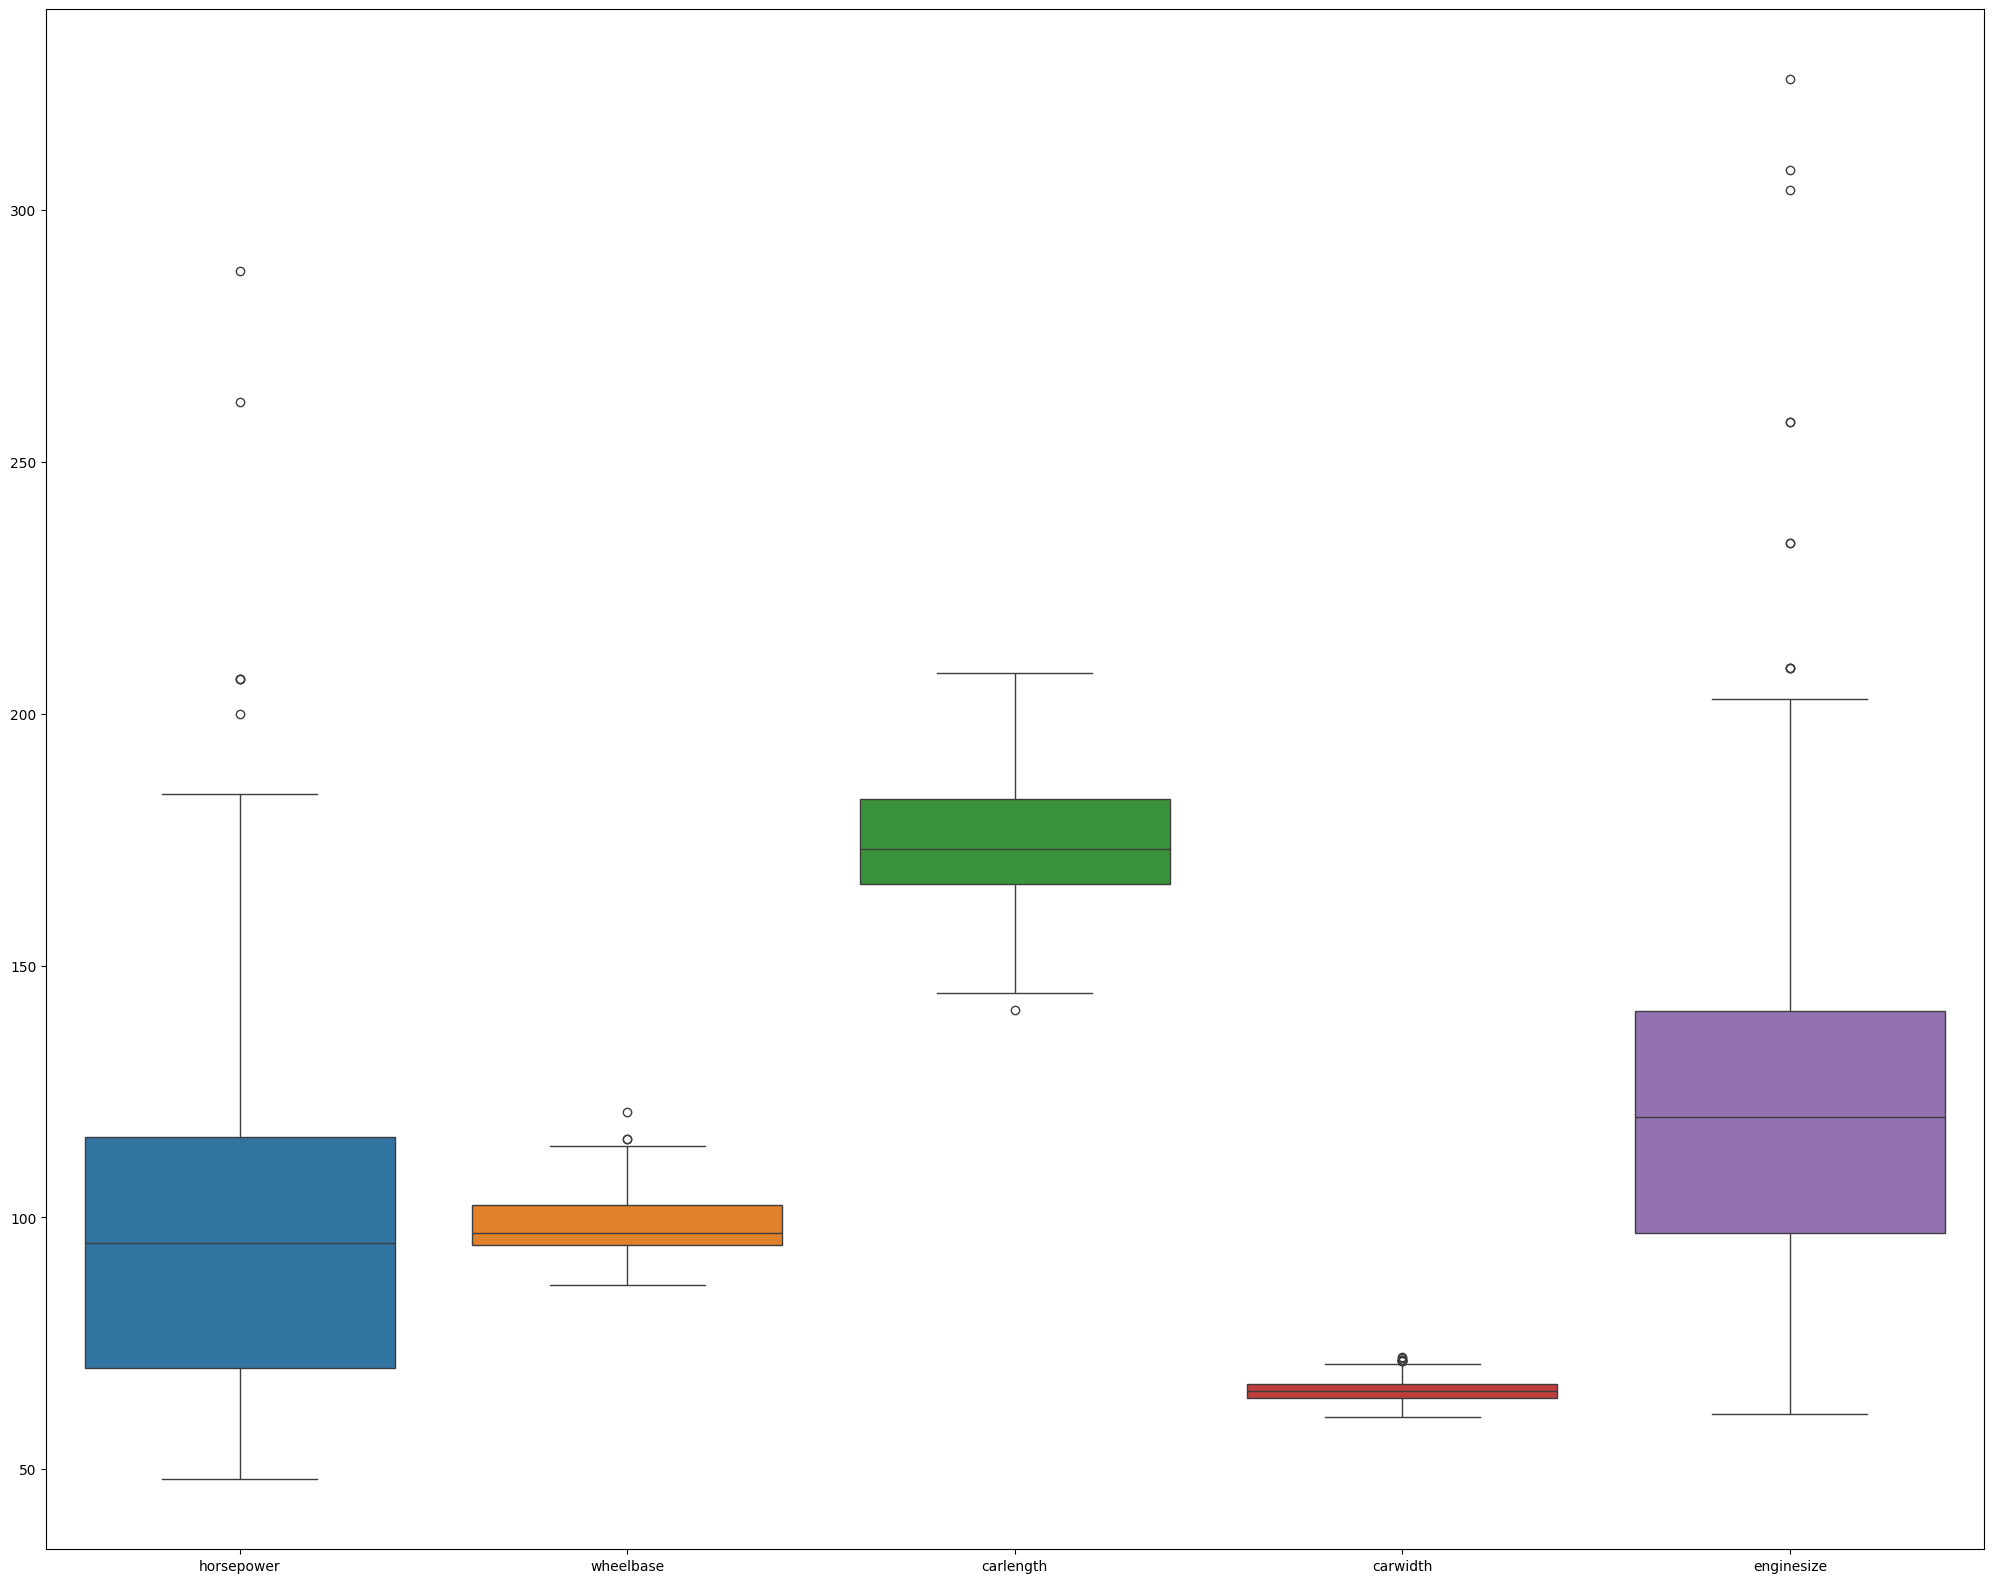

In [118]:
plt.figure(figsize=(25,20))
sns.boxplot(df[['horsepower','wheelbase','carlength','carwidth','enginesize']])
plt.show()

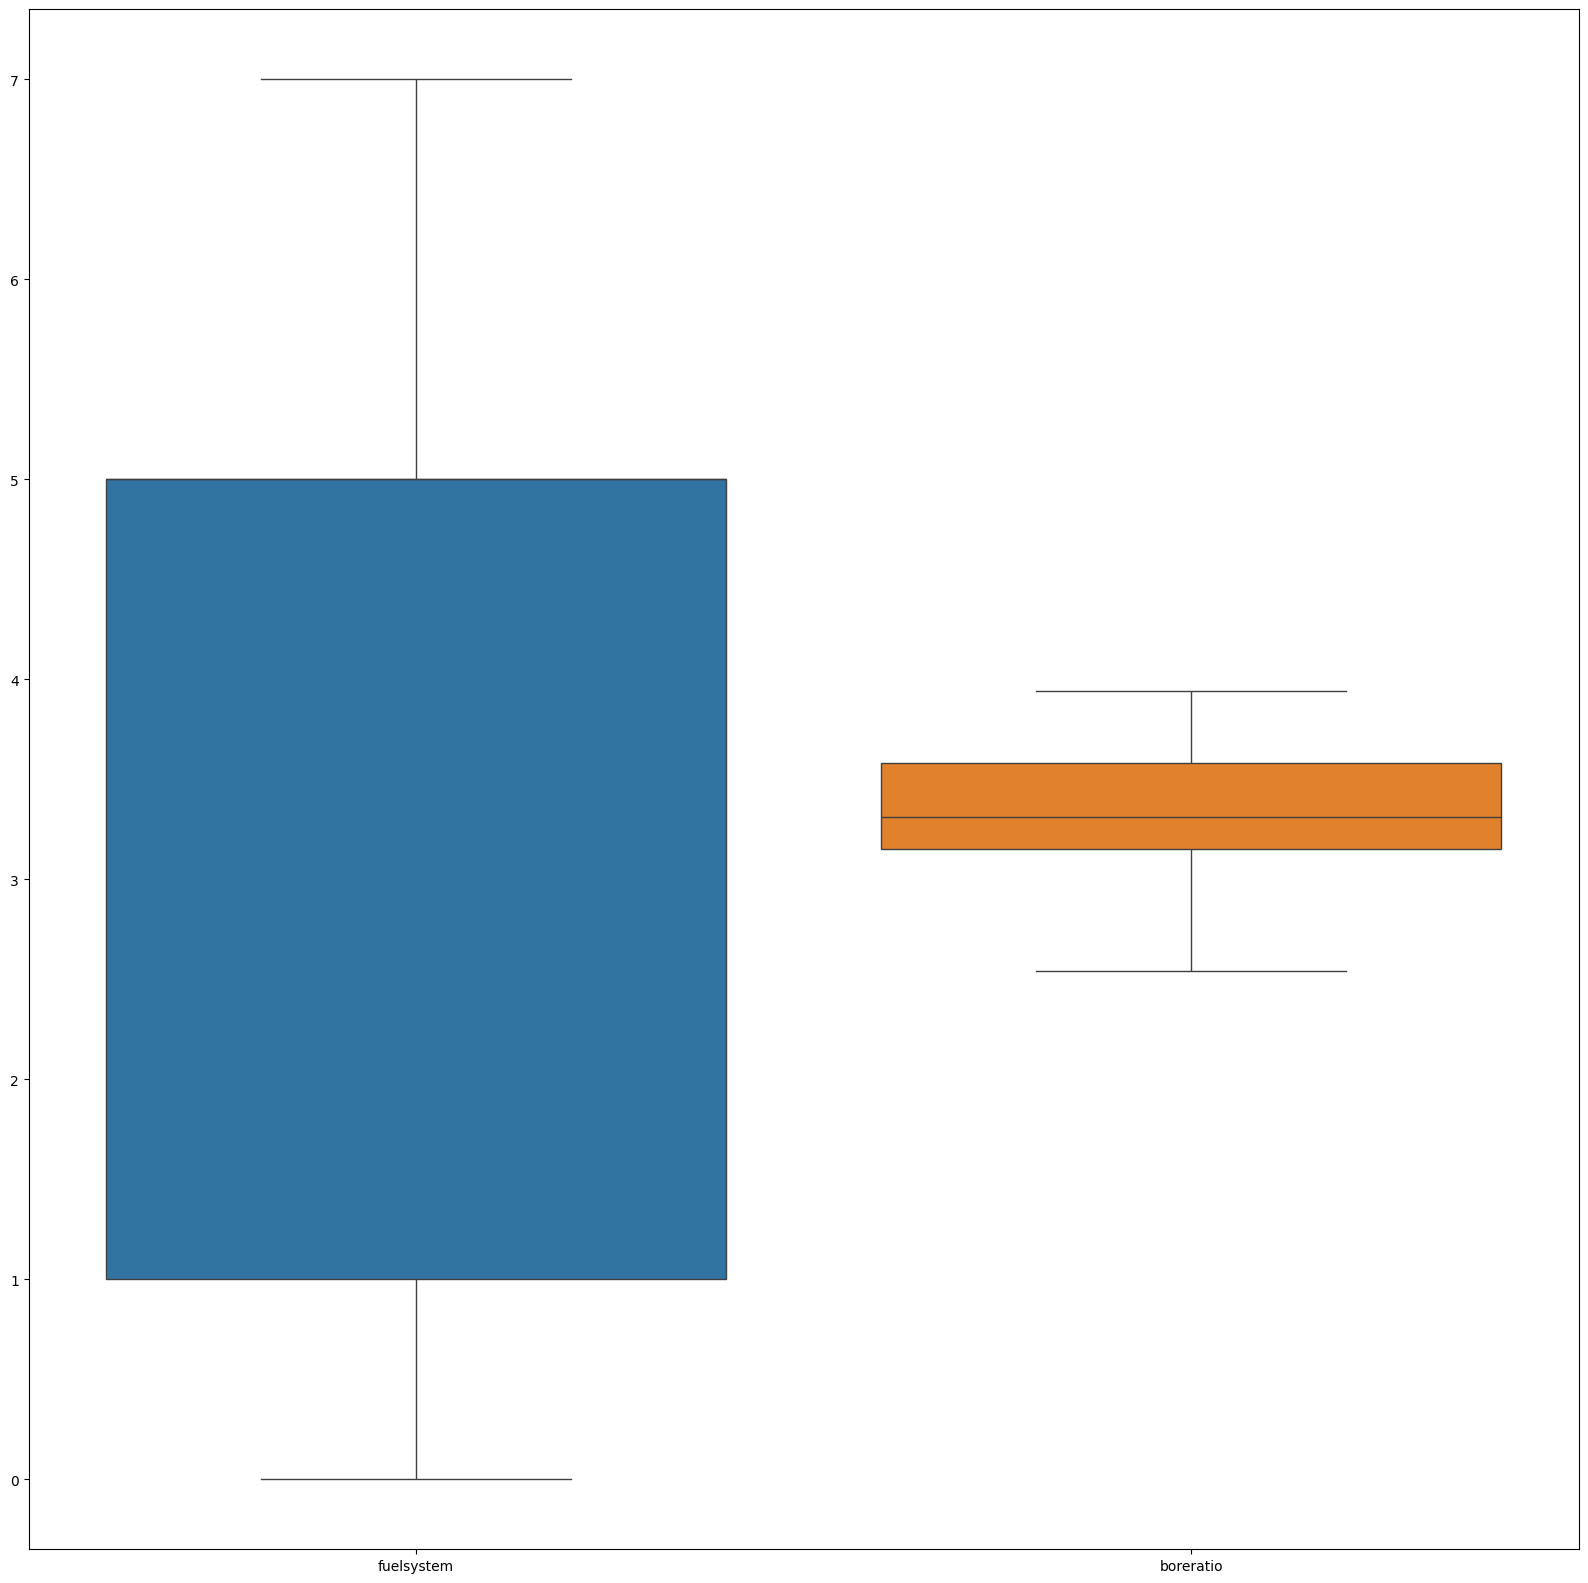

In [122]:
plt.figure(figsize=(20,20))
sns.boxplot(df[['fuelsystem','boreratio']])
plt.show()

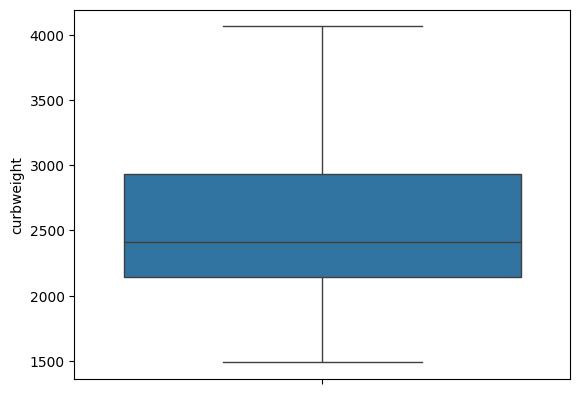

In [121]:
sns.boxplot(df['curbweight'])
plt.show()


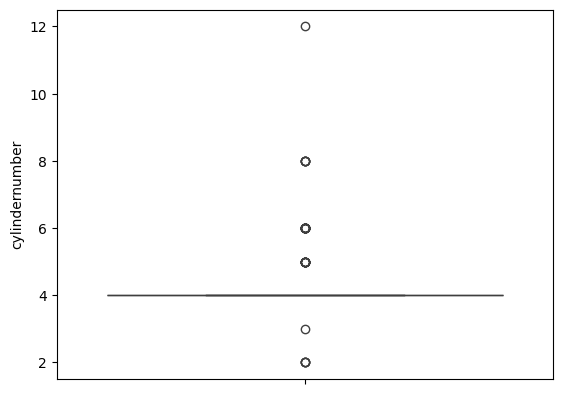

In [123]:
sns.boxplot(df['cylindernumber'])
plt.show()

#### There is no major outliers

#  Model Implementation

In [124]:
x=df[['horsepower','wheelbase','carlength','carwidth','enginesize','cylindernumber','fuelsystem','boreratio','curbweight']]#features
y=df['price']#target

#### 1) Linear Regression

In [125]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [126]:
from sklearn.linear_model import LinearRegression
X_train,X_test,Y_train,Y_test=train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [127]:
linreg=LinearRegression()
linreg.fit(X_train,Y_train)

LinearRegression()

In [153]:
y_pred_lin=linreg.predict(X_test)

In [154]:
y_pred_lin

array([25845.63303977, 19059.83820018, 11348.72497754, 13283.94921627,
       24133.5474996 ,  6557.95351668,  7678.26726915,  7324.1809771 ,
       10276.23876887,  7172.56370366, 15009.9908119 ,  7148.50760187,
       15374.69119974, 12220.40743766, 38246.60600887,  5823.20513615,
        -399.41447118, 18537.67678924, 11353.31269083, 10039.31153732,
       11758.84507708, 21479.64322867,  6585.10545035,  5289.35824618,
        6106.6801509 , 26740.3510622 , 14942.53592993, 16376.90086819,
        6491.88750229, 16090.64291491, 23582.14898303,  6055.05986425,
        6259.97666539, 21075.5447249 ,  8773.89767804, 23525.7955752 ,
       11400.94281123,  8313.43530402,  5906.44544354, 18748.55490895,
        9390.28420402])

In [155]:
result_lin=pd.DataFrame({'Actual values':Y_test,'Predicted values':y_pred_lin})
print(result_lin)

     Actual values  Predicted values
15       30760.000      25845.633040
9        17859.167      19059.838200
100       9549.000      11348.724978
132      11850.000      13283.949216
68       28248.000      24133.547500
95        7799.000       6557.953517
159       7788.000       7678.267269
162       9258.000       7324.180977
147      10198.000      10276.238769
182       7775.000       7172.563704
191      13295.000      15009.990812
164       8238.000       7148.507602
65       18280.000      15374.691200
175       9988.000      12220.407438
73       40960.000      38246.606009
152       6488.000       5823.205136
18        5151.000       -399.414471
82       12629.000      18537.676789
86        8189.000      11353.312691
143       9960.000      10039.311537
60        8495.000      11758.845077
101      13499.000      21479.643229
98        8249.000       6585.105450
30        6479.000       5289.358246
25        6692.000       6106.680151
16       41315.000      26740.351062
1

#### 2) Decision Tree Regressor

In [156]:
from sklearn.tree import DecisionTreeRegressor
decision_regr=DecisionTreeRegressor(max_depth=5)

In [157]:
decision_regr.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=5)

In [158]:
y_pred_regr=decision_regr.predict(X_test)
print(y_pred_regr)

[36954.         16667.97058824  8595.         14077.18181818
 36954.          6356.76        7838.46153846  7838.46153846
  8595.          7838.46153846 14077.18181818  7838.46153846
 10417.125      10542.3125     45400.          6356.76
  6356.76       16667.97058824  8595.          8595.
 10542.3125     16667.97058824  6356.76        6356.76
  6356.76       36954.         10417.125      16667.97058824
  6356.76       16667.97058824 36954.          6356.76
  8595.         18130.          9224.16666667 36954.
 14077.18181818 14077.18181818  7151.375      16667.97058824
  8595.        ]


In [159]:
result_regr=pd.DataFrame({'Actual values':Y_test,'Predicted values':y_pred_regr})
print(result_regr)

     Actual values  Predicted values
15       30760.000      36954.000000
9        17859.167      16667.970588
100       9549.000       8595.000000
132      11850.000      14077.181818
68       28248.000      36954.000000
95        7799.000       6356.760000
159       7788.000       7838.461538
162       9258.000       7838.461538
147      10198.000       8595.000000
182       7775.000       7838.461538
191      13295.000      14077.181818
164       8238.000       7838.461538
65       18280.000      10417.125000
175       9988.000      10542.312500
73       40960.000      45400.000000
152       6488.000       6356.760000
18        5151.000       6356.760000
82       12629.000      16667.970588
86        8189.000       8595.000000
143       9960.000       8595.000000
60        8495.000      10542.312500
101      13499.000      16667.970588
98        8249.000       6356.760000
30        6479.000       6356.760000
25        6692.000       6356.760000
16       41315.000      36954.000000
1

#### 3) Random Forest Regressor

In [160]:
from sklearn.ensemble import RandomForestRegressor
random_fr=RandomForestRegressor(n_estimators=100,random_state=0)


In [161]:
random_fr.fit(X_train,Y_train)

RandomForestRegressor(random_state=0)

In [162]:
y_pred_rfr=random_fr.predict(X_test)
print(y_pred_rfr)

[35256.295      18156.04        9258.86       12883.13
 28890.09        7341.95        7996.38        8028.11
 10597.915       8278.95       14801.5         7966.57
 12932.73       10743.28       39717.33        6257.9375
  5830.21441667 13752.61        8400.28       10011.47
 10385.33       14680.76        7337.67        5783.99108333
  7130.96       35195.795       9671.52       16637.46
  7294.92       16246.06       29018.665       6511.085
  7809.12       19585.73        8042.06       28621.125
 11313.795      12206.18        7048.04558333 14626.3
  8382.17      ]


In [163]:
result_rfr=pd.DataFrame({'Actual values':Y_test,'Predicted values':y_pred_rfr})
print(result_rfr)

     Actual values  Predicted values
15       30760.000      35256.295000
9        17859.167      18156.040000
100       9549.000       9258.860000
132      11850.000      12883.130000
68       28248.000      28890.090000
95        7799.000       7341.950000
159       7788.000       7996.380000
162       9258.000       8028.110000
147      10198.000      10597.915000
182       7775.000       8278.950000
191      13295.000      14801.500000
164       8238.000       7966.570000
65       18280.000      12932.730000
175       9988.000      10743.280000
73       40960.000      39717.330000
152       6488.000       6257.937500
18        5151.000       5830.214417
82       12629.000      13752.610000
86        8189.000       8400.280000
143       9960.000      10011.470000
60        8495.000      10385.330000
101      13499.000      14680.760000
98        8249.000       7337.670000
30        6479.000       5783.991083
25        6692.000       7130.960000
16       41315.000      35195.795000
1

#### 4) Gradient Boosting Regressor

In [164]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)

In [165]:
gbr.fit(X_train,Y_train)

GradientBoostingRegressor(random_state=42)

In [166]:
y_pred_gbr=gbr.predict(X_test)
y_pred_gbr

array([36002.44671989, 17811.91719601,  9196.72880806, 13039.85543884,
       34138.83812015,  7136.9163307 ,  8188.84891835,  7532.04208373,
       10330.49984903,  8139.19679419, 15908.13410477,  7678.75301182,
       17667.99513192, 11148.17219458, 42622.91096589,  5931.43866167,
        6405.4662421 , 13594.4676831 ,  8662.01032927,  9764.92423999,
        9983.83180432, 14478.12265366,  7136.9163307 ,  6167.57607666,
        6602.72267155, 35637.5391606 , 10419.94084782, 16707.21415128,
        7046.94293984, 16420.18797714, 34629.4553835 ,  6602.72267155,
        7380.71446237, 21525.18985572,  8328.56330663, 32960.70983109,
       11187.22458265, 11807.6317909 ,  7040.2865847 , 14129.94059603,
        7784.09936632])

In [167]:
result_gbr=pd.DataFrame({'Actual values':Y_test,'Predicted values':y_pred_gbr})
print(result_gbr)

     Actual values  Predicted values
15       30760.000      36002.446720
9        17859.167      17811.917196
100       9549.000       9196.728808
132      11850.000      13039.855439
68       28248.000      34138.838120
95        7799.000       7136.916331
159       7788.000       8188.848918
162       9258.000       7532.042084
147      10198.000      10330.499849
182       7775.000       8139.196794
191      13295.000      15908.134105
164       8238.000       7678.753012
65       18280.000      17667.995132
175       9988.000      11148.172195
73       40960.000      42622.910966
152       6488.000       5931.438662
18        5151.000       6405.466242
82       12629.000      13594.467683
86        8189.000       8662.010329
143       9960.000       9764.924240
60        8495.000       9983.831804
101      13499.000      14478.122654
98        8249.000       7136.916331
30        6479.000       6167.576077
25        6692.000       6602.722672
16       41315.000      35637.539161
1

#### 5) Support Vector Regressor


In [171]:
from sklearn.svm import SVR
svr_poly=SVR(kernel='poly',C=1e3,degree=1)

In [172]:
svr_poly.fit(X_train,Y_train)

SVR(C=1000.0, degree=1, kernel='poly')

In [173]:
y_pred_svr=svr_poly.predict(X_test)
print(y_pred_svr)

[21752.4507795  17821.03635744 10372.88729139 13295.87995936
 21706.7548759   6920.4908898   7895.17229278  7696.68489483
 10660.18118797  8413.99723473 14714.82412276  7599.83429511
 14012.05867772 12070.03172763 32191.40835456  6314.11093599
   -36.78230461 15041.94202479 10310.48786923 10355.39136301
 11170.57126016 18964.84226219  6822.33996378  4251.93609848
  6329.82877571 22811.3517138  12882.43913781 15669.61852677
  7095.26468997 15379.49331615 21147.90713413  6277.51111478
  7334.83872538 20214.82097599  8458.7337546  20678.41490516
 11380.23588848  7900.53785657  6117.14161772 15260.21201188
  9513.83151163]


In [174]:
result_svr=pd.DataFrame({'Actual values':Y_test,'Predicted values':y_pred_svr})
print(result_svr)

     Actual values  Predicted values
15       30760.000      21752.450780
9        17859.167      17821.036357
100       9549.000      10372.887291
132      11850.000      13295.879959
68       28248.000      21706.754876
95        7799.000       6920.490890
159       7788.000       7895.172293
162       9258.000       7696.684895
147      10198.000      10660.181188
182       7775.000       8413.997235
191      13295.000      14714.824123
164       8238.000       7599.834295
65       18280.000      14012.058678
175       9988.000      12070.031728
73       40960.000      32191.408355
152       6488.000       6314.110936
18        5151.000        -36.782305
82       12629.000      15041.942025
86        8189.000      10310.487869
143       9960.000      10355.391363
60        8495.000      11170.571260
101      13499.000      18964.842262
98        8249.000       6822.339964
30        6479.000       4251.936098
25        6692.000       6329.828776
16       41315.000      22811.351714
1

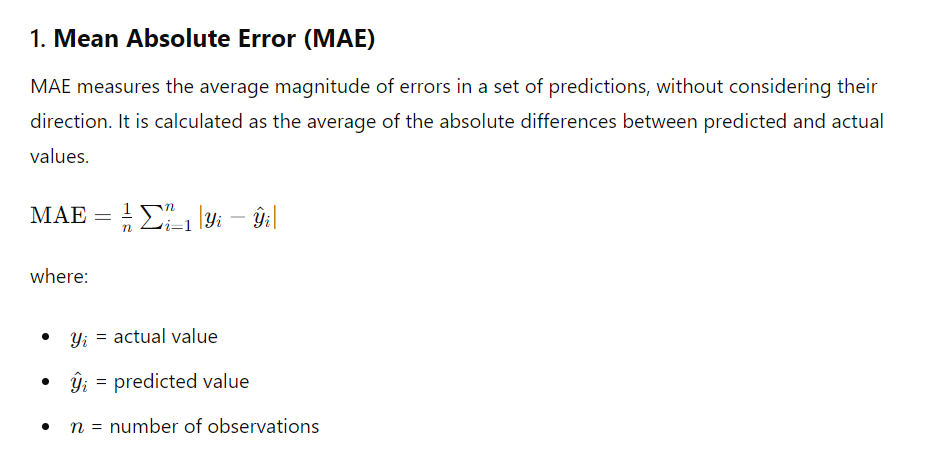

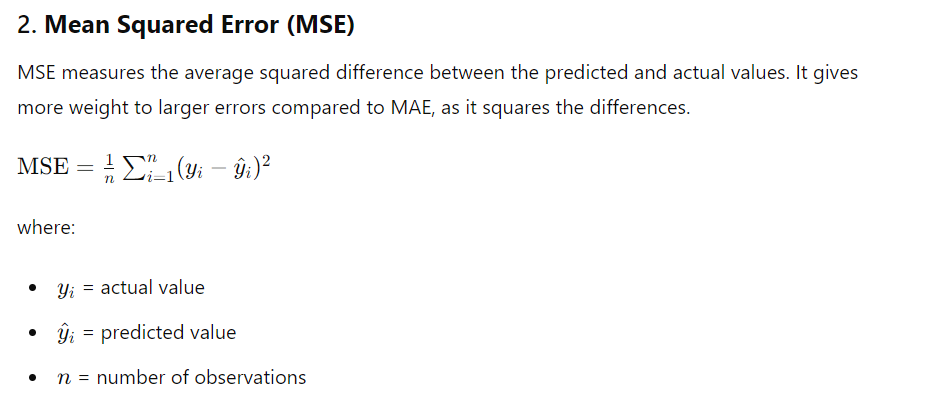

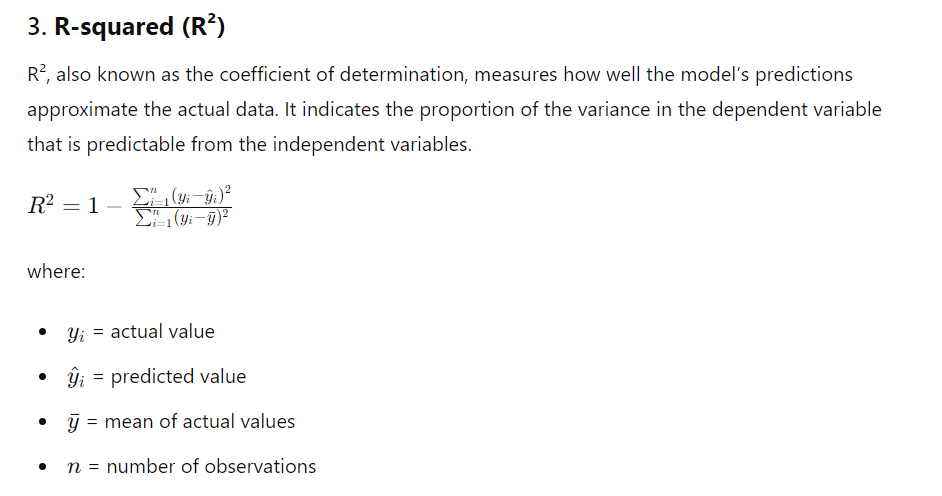

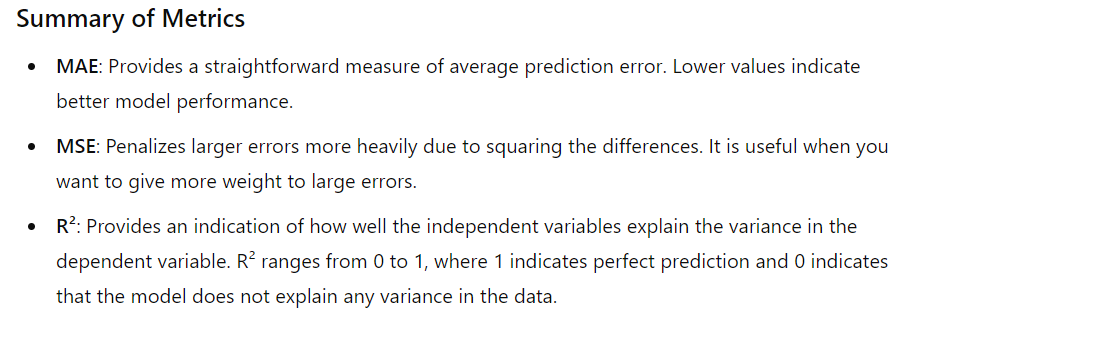

#### MAE,MSE & R-Square of linear model

In [175]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [177]:
mae_lin = mean_absolute_error(Y_test, y_pred_lin)
mse_lin = mean_squared_error(Y_test, y_pred_lin)
r2_lin= r2_score(Y_test, y_pred_lin)
print(f'MAE: {mae_lin}')
print(f'MSE: {mse_lin}')
print(f'R2: {r2_lin}')


MAE: 2622.6707462709082
MSE: 13716791.349949257
R2: 0.8262466087094912


#### MAE,MSE & R-Square of Decision Tree Regressor¶

In [178]:
mae_regr = mean_absolute_error(Y_test, y_pred_regr)
mse_regr = mean_squared_error(Y_test, y_pred_regr)
r2_regr= r2_score(Y_test, y_pred_regr)
print(f'MAE: {mae_regr}')
print(f'MSE: {mse_regr}')
print(f'R2: {r2_regr}')

MAE: 2519.18666566671
MSE: 13252778.74645867
R2: 0.8321243509161863


#### MAE,MSE & R-Square of Random Forest Regressor

In [179]:
mae_rfr = mean_absolute_error(Y_test, y_pred_rfr)
mse_rfr = mean_squared_error(Y_test, y_pred_rfr)
r2_rfr= r2_score(Y_test, y_pred_rfr)
print(f'MAE: {mae_rfr}')
print(f'MSE: {mse_rfr}')
print(f'R2: {r2_rfr}')

MAE: 1225.7121524390245
MSE: 3576543.0784006207
R2: 0.9546951999841419


#### MAE,MSE & R-Square of  Gradient Boosting Regressor

In [180]:
mae_gbr = mean_absolute_error(Y_test, y_pred_gbr)
mse_gbr = mean_squared_error(Y_test, y_pred_gbr)
r2_gbr= r2_score(Y_test, y_pred_gbr)
print(f'MAE: {mae_gbr}')
print(f'MSE: {mse_gbr}')
print(f'R2: {r2_gbr}')

MAE: 1540.185491001429
MSE: 6194881.431460493
R2: 0.9215281744908335


#### MAE,MSE & R-Square of  Support Vector Regressor

In [181]:
mae_svr = mean_absolute_error(Y_test, y_pred_svr)
mse_svr = mean_squared_error(Y_test, y_pred_svr)
r2_svr= r2_score(Y_test, y_pred_svr)
print(f'MAE: {mae_svr}')
print(f'MSE: {mse_svr}')
print(f'R2: {r2_svr}')

MAE: 2727.207820613484
MSE: 18994974.447489176
R2: 0.7593867878044225


In [185]:
print(f'MAE of linear regression: {mae_lin}')
print(f'MAE of Decision Tree Regressor: {mae_regr}')
print(f'MAE of Random Forest Regressor: {mae_rfr}')
print(f'MAE of  Gradient Boosting Regressor:{mae_gbr}')
print(f'MAE of Support Vector Regressor: {mae_svr}')

MAE of linear regression: 2622.6707462709082
MAE of Decision Tree Regressor: 2519.18666566671
MAE of Random Forest Regressor: 1225.7121524390245
MAE of  Gradient Boosting Regressor:1540.185491001429
MAE of Support Vector Regressor: 2727.207820613484


#### The lowest MAE got in the model Random Forest Regressor

In [186]:
print(f'MSE of linear regression: {mse_lin}')
print(f'MSE of Decision Tree Regressor: {mse_regr}')
print(f'MSE of Random Forest Regressor: {mse_rfr}')
print(f'MSE of  Gradient Boosting Regressor:{mse_gbr}')
print(f'MSE of Support Vector Regressor: {mse_svr}')

MSE of linear regression: 13716791.349949257
MSE of Decision Tree Regressor: 13252778.74645867
MSE of Random Forest Regressor: 3576543.0784006207
MSE of  Gradient Boosting Regressor:6194881.431460493
MSE of Support Vector Regressor: 18994974.447489176


#### The lowest MSE got in the model Random Forest Regressor

In [188]:
print(f'R-Square of linear regression: {r2_lin}')
print(f'R-Square of Decision Tree Regressor: {r2_regr}')
print(f'R-Square of Random Forest Regressor: {r2_rfr}')
print(f'R-Square of  Gradient Boosting Regressor:{r2_gbr}')
print(f'R-Square of Support Vector Regressor: {r2_svr}')

R-Square of linear regression: 0.8262466087094912
R-Square of Decision Tree Regressor: 0.8321243509161863
R-Square of Random Forest Regressor: 0.9546951999841419
R-Square of  Gradient Boosting Regressor:0.9215281744908335
R-Square of Support Vector Regressor: 0.7593867878044225


#### The random forest model shows R-Square value more close to 1

#### As per MAE,MSE and R-Square values,
#### it is evident that the Random Forest model is more accurate and better performed.

### The significant variables affecting car prices are
##### 1.Horse power
##### 2.Engine size
##### 3.Curb weight
##### 4.Car width,length,wheel base
##### 5.Cylinder number
##### 6.Fuel system
##### 7.Bore ratio